# Naive, Finite Automata and KMP pattern finding algorithms

In [1]:
import time
import matplotlib.pyplot as plt

## Naive algorithm

In [2]:
# naive matching agorithm
def naiwny_sercz_2(p, T):
    m = len(p)
    result = []
    t0 = time.time()
    for i in range(len(T)):
        if T[i : i + m] == p:
            result.append(i)
    t1 = time.time() - t0
    return result, t1

## Finite Automata

### Delta Function

In [3]:
# generating a delta function for finite automata algorithm
def get_delta(p):
    result = [{} for i in range(len(p) + 1)]
    letters = set()
    for l in p:
        if l not in letters:
            letters.add(l)
    for q in range(len(p) + 1):
        for l in letters:
            k = min(len(p) + 1, q + 1)
            while k > 0:
                if p[:k] == (p[:q] + l)[-k:]:
                    break
                k -= 1
            result[q][l] = k
    return result

### Main algorithm

In [4]:
# finite automata algorithm
def finite_automata(p, T):
    delta = get_delta(p)
    length = len(p)
    q = 0
    result = []
    t0 = time.time()
    for i in range(len(T)):
        if T[i] in delta[q]:
            q = delta[q][T[i]]
            if q == length:
                result.append(i + 1 - q)
        else:
            q = 0

    t1 = time.time() - t0
    return result, t1

## KMP algorithm

### Prefix Function

In [5]:
# generating prefix function for kmp algorithm
def prefix(p):
    result = [0]
    k = 0
    for q in range(1, len(p)):
        while k > 0 and p[k] != p[q]:
            k = result[k - 1]
        if p[k] == p[q]:
            k += 1
        result.append(k)
    return result

### Main algorithm

In [6]:
# kmp algorithm
def kmp(p, T):
    pi = prefix(p)
    q = 0
    result = []
    t0 = time.time()
    for i in range(len(T)):
        while q > 0 and T[i] != p[q]:
            q = pi[q - 1]
        if p[q] == T[i]:
            q += 1
        if q == len(p):
            result.append(i + 1 - q)
            q = pi[q - 1]
    t1 = time.time() - t0
    return result, t1

## Comparing algorithms

In [7]:
text1 = open("1997_714.txt", "r", encoding="utf8").read()

In [8]:
p = "art"
resultA1 = naiwny_sercz_2(p, text1)
resultA2 = finite_automata(p, text1)
resultA3 = kmp(p, text1)

In [9]:
print("time for naive: ", round(resultA1[1], 5), "s", sep="")
print("time for fa:    ", round(resultA2[1], 5), "s", sep="")
print("rime for kmp:   ", round(resultA3[1], 5), "s", sep="")
if resultA1[0] != resultA2[0] or resultA1[0] != resultA3[0]:
    print("błąd")

time for naive: 0.04285s
time for fa:    0.03291s
rime for kmp:   0.06483s


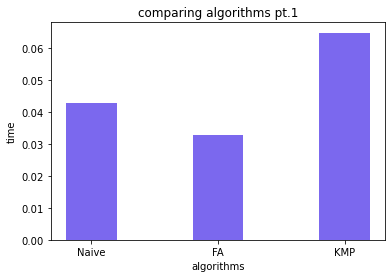

In [10]:
left = [1, 2, 3]
height = [resultA1[1], resultA2[1], resultA3[1]]
tick_label = ["Naive", "FA", "KMP"]
plt.bar(left, height, tick_label=tick_label, width=0.4, color=["mediumslateblue"])
plt.xlabel("algorithms")
plt.ylabel("time")
plt.title("comparing algorithms pt.1")
plt.show()

## Comparing algorithms pt. 2

In [11]:
text2 = open("passages-head.tsv", "r", encoding="utf8").read()

In [12]:
p2 = "Ukraina"
resultB1 = naiwny_sercz_2(p2, text2)
resultB2 = finite_automata(p2, text2)
resultB3 = kmp(p2, text2)

In [13]:
print("time for naive: ", round(resultB1[1], 5), "s", sep="")
print("time for fa:    ", round(resultB2[1], 5), "s", sep="")
print("rime for kmp:   ", round(resultB3[1], 5), "s", sep="")
if resultB1[0] != resultB2[0] or resultB1[0] != resultB3[0]:
    print("błąd")

time for naive: 15.25163s
time for fa:    11.03897s
rime for kmp:   16.4969s


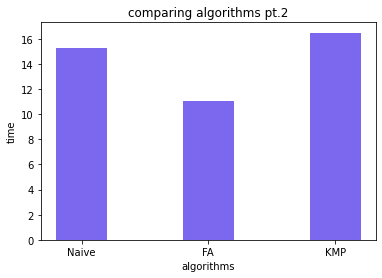

In [14]:
left = [1, 2, 3]
height = [resultB1[1], resultB2[1], resultB3[1]]
tick_label = ["Naive", "FA", "KMP"]
plt.bar(left, height, tick_label=tick_label, width=0.4, color=["mediumslateblue"])
plt.xlabel("algorithms")
plt.ylabel("time")
plt.title("comparing algorithms pt.2")
plt.show()

## Worst case for naive algorithm

In [15]:
testText = "a" * 10000000
ex_p = "a" * 30000
check_naive = naiwny_sercz_2(ex_p, testText)
check_fa = finite_automata(ex_p, testText)
check_kmp = kmp(ex_p, testText)

In [16]:
print(check_naive[1])
print(check_fa[1])
print(check_kmp[1])

23.812530517578125
3.2221457958221436
5.16250467300415


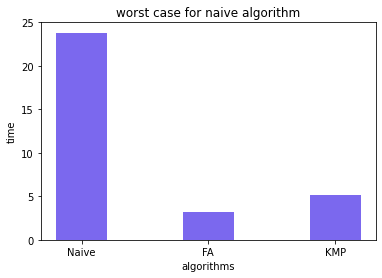

In [17]:
left = [1, 2, 3]
height = [check_naive[1], check_fa[1], check_kmp[1]]
tick_label = ["Naive", "FA", "KMP"]
plt.bar(left, height, tick_label=tick_label, width=0.4, color=["mediumslateblue"])
plt.xlabel("algorithms")
plt.ylabel("time")
plt.title("worst case for naive algorithm")
plt.show()

## delta and prefix function comparison

In [18]:
worst_pattern = "abcdefghijklmnoprstuwxyz" * 20

In [19]:
start1 = time.time()
get_delta(worst_pattern)
end1 = time.time()

start2 = time.time()
prefix(worst_pattern)
end2 = time.time()

In [20]:
print("worst case delta generating:  ", round(end1 - start1, 12), "s", sep="")
print("worst case prefix generating: ", round(end2 - start2, 12), "s", sep="")

worst case delta generating:  1.207590818405s
worst case prefix generating: 0.0s


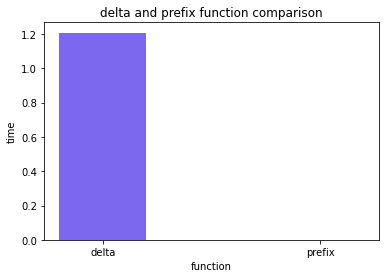

In [21]:
left = [1, 2]
height = [end1 - start1, end2 - start2]
tick_label = ["delta", "prefix"]
plt.bar(left, height, tick_label=tick_label, width=0.4, color=["mediumslateblue"])
plt.xlabel("function")
plt.ylabel("time")
plt.title("delta and prefix function comparison")
plt.show()